### 14. Linear Regression Using Normal Equation (easy)
Write a Python function that performs linear regression using the normal equation. The function should take a matrix X (features) and a vector y (target) as input, and return the coefficients of the linear regression model. Round your answer to four decimal places, -0.0 is a valid result for rounding a very small number.

In [2]:
import numpy as np
def linear_regression_normal_equation(X: list[list[float]], y: list[float]) -> list[float]:
	# Normal Equation: (X^T * X)^-1 * X^T * y
	X = np.array(X)
	y = np.array(y).reshape(-1,1)
	XT = X.T
	coef = np.linalg.inv(XT.dot(X)).dot(XT).dot(y)
	coef = np.round(coef,4).flatten().tolist()
	return coef

X = [[1, 1], [1, 2], [1, 3]] 
y = [1, 2, 3]
coef = linear_regression_normal_equation(X,y)
print(coef)

y before reshaping: [1, 2, 3]
y after reshaping: [[1]
 [2]
 [3]]
[0.0, 1.0]


### 15. Linear Regression Using Gradient Descent (easy)
Write a Python function that performs linear regression using gradient descent. The function should take NumPy arrays X (features with a column of ones for the intercept) and y (target) as input, along with learning rate alpha and the number of iterations, and return the coefficients of the linear regression model as a NumPy array. Round your answer to four decimal places. -0.0 is a valid result for rounding a very small number.

In [5]:
import numpy as np
def linear_regression_gradient_descent(X: np.ndarray, y: np.ndarray, alpha: float, iterations: int) -> np.ndarray:
    m, n = X.shape
    theta = np.zeros((n, 1))
    y = y.reshape(-1,1)
    for _ in range(iterations):
        predictions = X @ theta # X.dot(theta)
        errors = predictions - y
        updates = X.T @ errors / m # X.T.dot(errors)
        theta -= alpha * updates
    return np.round(theta.flatten(),4)

X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([1, 2, 3])
alpha = 0.01
iterations = 1000
# output: np.array([0.1107, 0.9513])
out = linear_regression_gradient_descent(X,y,alpha,iterations)
print(out)

[0.1107 0.9513]


### 16. Feature Scaling Implementation (easy)
Write a Python function that performs feature scaling on a dataset using both standardization and min-max normalization. The function should take a 2D NumPy array as input, where each row represents a data sample and each column represents a feature. It should return two 2D NumPy arrays: one scaled by standardization and one by min-max normalization. Make sure all results are rounded to the nearest 4th decimal.

In [8]:
import numpy as np
def feature_scaling(data: np.ndarray) -> (np.ndarray, np.ndarray):
	# Standarization: value = X-mean / std
	mean = data.mean(axis=0)
	std = data.std(axis=0)
	standardized_data = (data-mean)/std
	
	# # Min-Max norm: value-min / max-min
	min_val = np.min(data,axis=0)
	max_val = np.max(data,axis=0)
	normalized_data = (data-min_val)/(max_val-min_val)

	return np.round(standardized_data,4).tolist(), np.round(normalized_data,4).tolist()

data = np.array([[1, 2], [3, 4], [5, 6]])
st,nm = feature_scaling(data)
print(st)
print(nm)

[[-1.2247, -1.2247], [0.0, 0.0], [1.2247, 1.2247]]
[[0.0, 0.0], [0.5, 0.5], [1.0, 1.0]]


### 17. K-Means Clustering (medium)
Your task is to write a Python function that implements the k-Means clustering algorithm. This function should take specific inputs and produce a list of final centroids. k-Means clustering is a method used to partition n points into k clusters. The goal is to group similar points together and represent each group by its center (called the centroid).

Function Inputs:
points: A list of points, where each point is a tuple of coordinates (e.g., (x, y) for 2D points)
k: An integer representing the number of clusters to form
initial_centroids: A list of initial centroid points, each a tuple of coordinates
max_iterations: An integer representing the maximum number of iterations to perform
Function Output:
A list of the final centroids of the clusters, where each centroid is rounded to the nearest fourth decimal.



final centroids [[1.2903225806451613, 1.935483870967742], [10.0, 2.0689655172413794]]


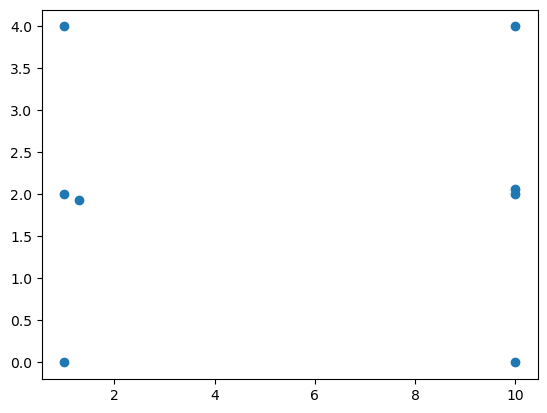

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def k_means_clustering(points: list[tuple[float, float]], k: int, initial_centroids: list[tuple[float, float]], max_iterations: int) -> list[tuple[float, float]]:
    clusters = [[] for _ in range(k)]
    centroids = initial_centroids
    for iter in range(max_iterations):
        #assign a centroid to each point using eculidean distance
        for point in points:
            distances_to_centroids = [np.linalg.norm(np.array(point)-np.array(centroid)) for centroid in centroids]
            cluster_assg = np.argmin(distances_to_centroids)
            clusters[cluster_assg].append(point)
    
        #Calculate new centroids (mean of all points)
        centroids = []
        for cluster in clusters:
            means = [np.mean(dim) for dim in zip(*cluster)]
            centroids.append(means)
    
    return centroids

points = [(1, 2), (1, 4), (1, 0), (10, 2), (10, 4), (10, 0)]
k = 2
initial_centroids = [(4,4), (6, 6)]
max_iterations = 10
final_centroids = k_means_clustering(points,k,initial_centroids,max_iterations)
print('final centroids',final_centroids)

x = []
y = []
for point in points:
    x.append(point[0])
    y.append(point[1])

for centroid in final_centroids:
    x.append(centroid[0])
    y.append(centroid[1])
plt.scatter(x,y)

### 18. Cross-Validation Data Split Implementation (medium)
Write a Python function that performs k-fold cross-validation data splitting from scratch. The function should take a dataset (as a 2D NumPy array where each row represents a data sample and each column represents a feature) and an integer k representing the number of folds. The function should split the dataset into k parts, systematically use one part as the test set and the remaining as the training set, and return a list where each element is a tuple containing the training set and test set for each fold.

In [27]:
import numpy as np
def cross_validation_split(data: np.ndarray, k: int, seed=42) -> list:
    np.random.seed(seed)
    #np.random.shuffle(data)

    n, m = data.shape
    sub_size = int(np.ceil(n/k))
    id_s = np.arange(0, n, sub_size) # start indices for each fold
    id_e = id_s + sub_size # end indices for each fold
    if id_e[-1] > n: id_e[-1] = n # if last elem is bigger that the number of points, adjust to only contain the remaining points
    
    return [[np.concatenate([data[: id_s[i]], data[id_e[i]:]], axis=0).tolist(), data[id_s[i]: id_e[i]].tolist()] for i in range(k)]

data = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
k = 5
kfolds = cross_validation_split(data, k)
print(kfolds)

[[[[3, 4], [5, 6], [7, 8], [9, 10]], [[1, 2]]], [[[1, 2], [5, 6], [7, 8], [9, 10]], [[3, 4]]], [[[1, 2], [3, 4], [7, 8], [9, 10]], [[5, 6]]], [[[1, 2], [3, 4], [5, 6], [9, 10]], [[7, 8]]], [[[1, 2], [3, 4], [5, 6], [7, 8]], [[9, 10]]]]


### 19. Principal Component Analysis (PCA) Implementation (medium)
Write a Python function that performs Principal Component Analysis (PCA) from scratch. The function should take a 2D NumPy array as input, where each row represents a data sample and each column represents a feature. The function should standardize the dataset, compute the covariance matrix, find the eigenvalues and eigenvectors, and return the principal components (the eigenvectors corresponding to the largest eigenvalues). The function should also take an integer k as input, representing the number of principal components to return.